# [Augmentation]

*KU LeeDongGyu*

### Contents

1. Data Impoert
```
1) Horizontal and Vertical Shift Augmentation
2) Horizontal and Vertical Flip Augmentation
3) Random Rotation Augmentation
4) Random Brightness Augmentation
5) Random Zoom Augmentation
6) All Together
```
2. Example with CIFAR10
```
1) Data Argumentation
2) Normal Data
```

### Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img , img_to_array , ImageDataGenerator
from numpy import expand_dims

## 1. Data Import
---

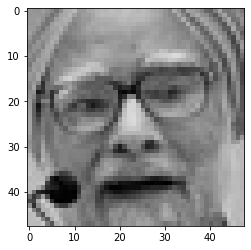

In [0]:
# data augmentation
# 1. 보통은 상하반전 대신, 좌우반전을 한다. 그래도 넣어서 나쁠건 없음.
# 2. cnn의 크기가 어느정도 커지면 회전이 들어가도 분류를 잘하기에, 회전은 잘 하지 않는다. 그래도 넣어서 나쁠건 없음.


# 0 . data import
img1=load_img("C:/Users/82104/Desktop/fer2013/all_images/00000001.jpg")
data = img_to_array(img1)
data.shape # 자동으로 rgb로 만들어줌. (채널 : 3)

plt.imshow(img1)
# plt.imshow(data/255) 와 같다.

### 1)  Horizontal and Vertical Shift Augmentation

#### (1) Horizontal

In [0]:
# horizontal

samples = data[np.newaxis,:]
# samples = np.expand_dims(data,0) 과 같음.

In [0]:
datagen = ImageDataGenerator(width_shift_range=[-10,10])
# 움직일 폭을 결정. -10 또는 10 pixel 만 정확하게 움직임.
# 만약 0과 1사이의 scalar 값을 주게되면, pixel의 해당 비율로 인식하여
# 그 값 내에서 좌우 이동을 시킨다.

In [0]:
it = datagen.flow(samples,batch_size=1)
# it은 iter의 약자
# datagen.flow(x_train,y_train,batch_size = 32)
# batch_size 만큼 데이터 생성

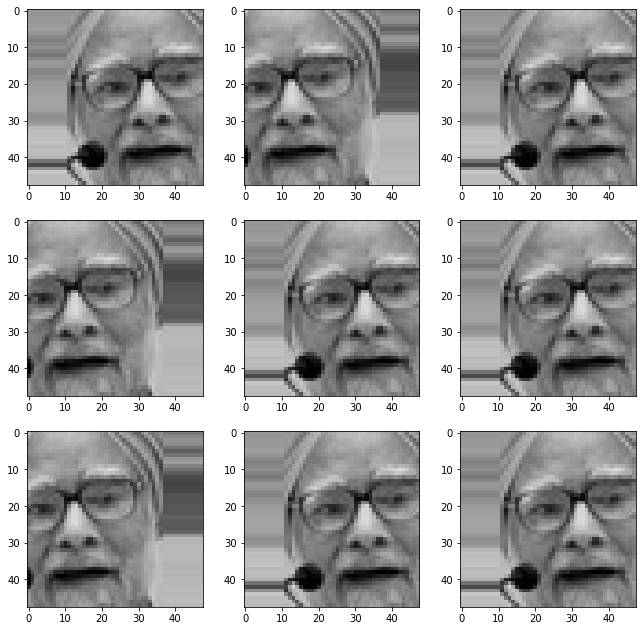

In [0]:
fig = plt.figure(figsize=(11,11)) # 9개짜리 figure받을 공간 생성

for i in range(9) :
    plt.subplot(3,3,i+1)
    batch = it.next()
    # next는 자체의 함수 혹은 매서드. datagen.flow에서는 method로 갖는다.
    # 자체로는 못쓰고, 보통 iter함수와 같이 쓴다.
    # 즉, iterator로 만들어주고, 거기서 next를 쓰는것.

    image = batch[0].astype('uint8')
    # batch에는 1개 값만 저장되고, 그 값의 차원은 (1,48,48,3) 임.
    # batch[0]은 (48,48,3)의 차원을 출력.
    plt.imshow(image)


#### (2) Vertical

In [0]:
samples = data[np.newaxis,:]

In [0]:
datagen = ImageDataGenerator(height_shift_range=0.5)
# height_shift_range 는 width_shift_range 와 같다.

In [0]:
it = datagen.flow(samples,batch_size=1)

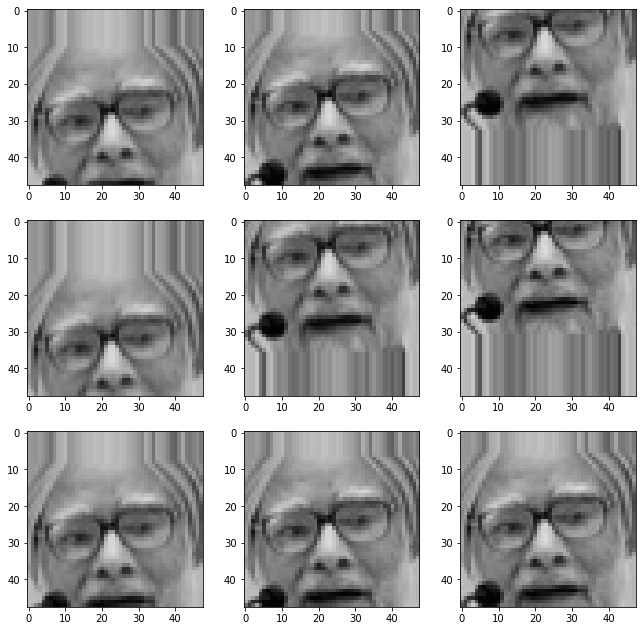

In [0]:
fig = plt.figure(figsize=(11,11))
for i in range(9):
    plt.subplot(330+1+i)
    # 331 ~ 339 로, (3,3,1)~(3,3,9) 를 세자리 정수로도 받을 수 있음.

    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)

### 2)  Horizontal and Vertical Flip Augmentation

In [0]:
samples = expand_dims(data,0)

In [0]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True)

In [0]:
it = datagen.flow(samples,batch_size=1)

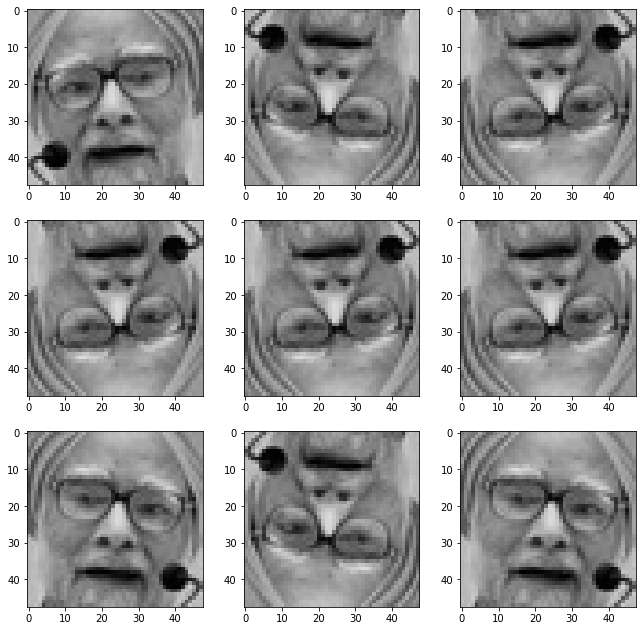

In [0]:
fig = plt.figure(figsize=(11,11))
for i in range(9):
    plt.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)


### 3) Random Rotation Augmentation

In [0]:
samples = expand_dims(data,0)

In [0]:
datagen = ImageDataGenerator(rotation_range=90)
# 좌,우로 최대 90도까지 회전할수 있다는 뜻.

In [0]:
it = datagen.flow(samples,batch_size=1)

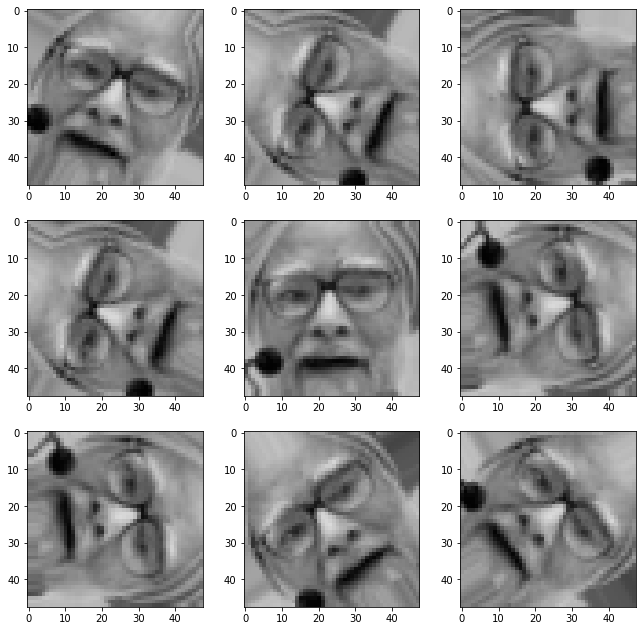

In [0]:
fig = plt.figure(figsize=(11,11))
for i in range(9):
    plt.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)

### 4) Random Brightness Augmentation

In [0]:
samples = expand_dims(data,0)

In [0]:
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])

In [0]:
it = datagen.flow(samples,batch_size=1)

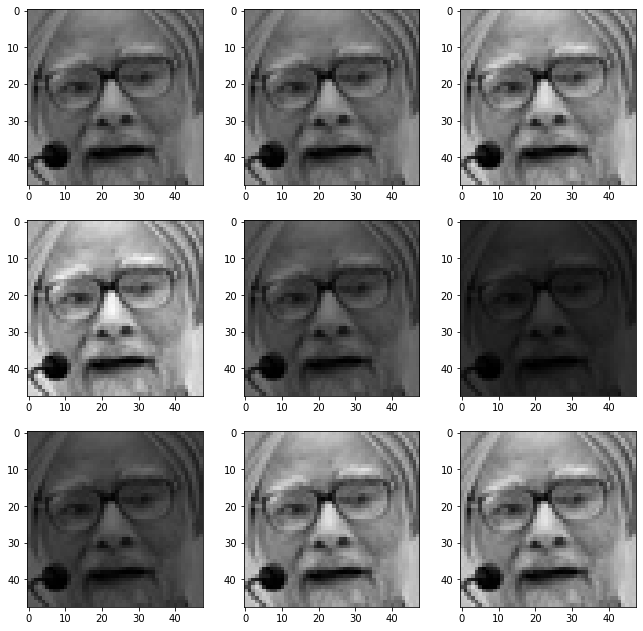

In [0]:
fig = plt.figure(figsize=(11,11))
for i in range(9):
    plt.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)

### 5) Random Zoom Augmentation

In [0]:
samples = expand_dims(data,0)

In [0]:
datagen = ImageDataGenerator(zoom_range=[0.5,1])

In [0]:
it = datagen.flow(samples,batch_size=1)

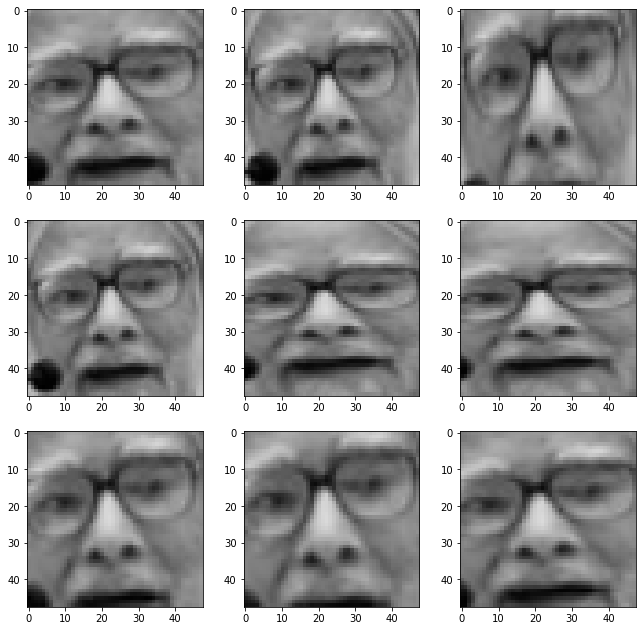

In [0]:
fig = plt.figure(figsize=(11,11))
for i in range(9):
    plt.subplot(330+1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)

### 6) All Together

In [0]:
samples = expand_dims(data,0)

In [0]:
datagen = ImageDataGenerator(
    zoom_range=[0.5,1.0],
    brightness_range=[0.5,1.0],
    rotation_range=30,
    horizontal_flip = True,
    vertical_flip = True,
    height_shift_range = 0.1,
    width_shift_range = 0.1)

In [0]:
it = datagen.flow(samples,batch_size=1)

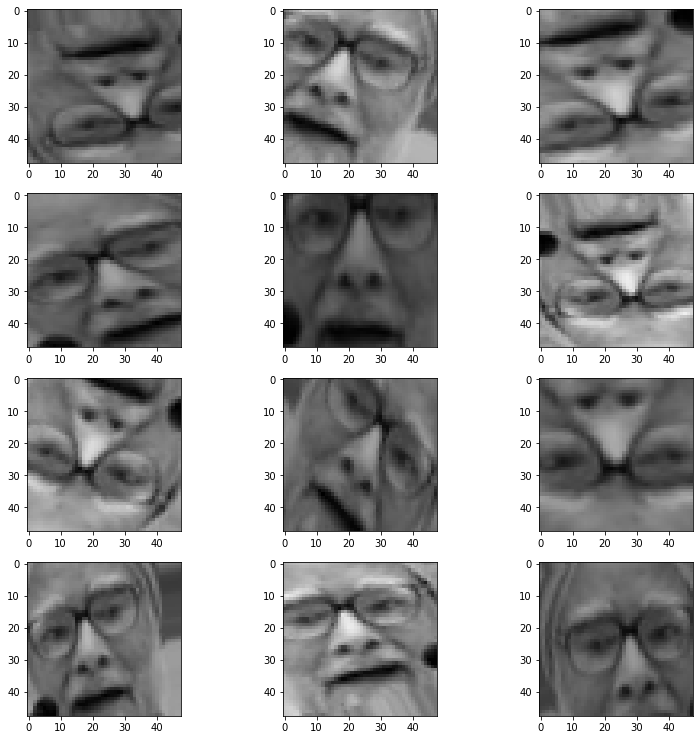

In [0]:
fig = plt.figure(figsize=(13,13))
for i in range(12):
    plt.subplot(4,3,1+i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)


## 2. Example with CIFAR10
---

In [2]:
(x_train,y_train), (x_test,y_test) = tf.keras.datasets.cifar10.load_data()
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="constant",
    cval=0)

In [0]:
datagen.fit(x_train) # 이렇게 하므로써 x_train 데이터에 std,mean,pca, whitening같은 것을 사전적용한다.
# 이 경우, featurewise_center=True, featurewise_std_normalization=True 값들 때문에 필요함.

In [5]:
# simple cnn
inputs = tf.keras.Input(shape=(32,32,3))
x=tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                                     activation='relu', input_shape=(32,32,3), strides = (1,1) , name='Conv2D_layer1')(inputs)
x=(tf.keras.layers.MaxPooling2D((2, 2), name='Maxpooling1_2D'))(x)
x=tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                                     activation='relu', strides = (1,1) , name='Conv2D_layer2')(x)
x= tf.keras.layers.MaxPooling2D((2, 2), name='Maxpooling2_2D')(x)
x = tf.keras.layers.Flatten(name='Flatten')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x=tf.keras.layers.Dense(32, activation='relu', name='Hidden_layer')(x)
outputs =tf.keras.layers.Dense(10, activation='softmax', name='Output_layer')(x)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### 1) Data Argumentation

In [0]:
## data argumentation
model=tf.keras.Model(inputs=inputs,outputs=outputs)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv2D_layer1 (Conv2D)       (None, 30, 30, 16)        448       
_________________________________________________________________
Maxpooling1_2D (MaxPooling2D (None, 15, 15, 16)        0         
_________________________________________________________________
Conv2D_layer2 (Conv2D)       (None, 13, 13, 16)        2320      
_________________________________________________________________
Maxpooling2_2D (MaxPooling2D (None, 6, 6, 16)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0     

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


In [10]:
model.fit_generator(datagen.flow(x_train,y_train,batch_size=32),
                    steps_per_epoch=len(x_train)/32,epochs=10)

Epoch 1/10
1563/1562 [==============================] - 33s 21ms/step - loss: 1.8883 - acc: 0.2932
Epoch 2/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.6899 - acc: 0.3723
Epoch 3/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.6191 - acc: 0.4020
Epoch 4/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.5775 - acc: 0.4213
Epoch 5/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.5505 - acc: 0.4321
Epoch 6/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.5278 - acc: 0.4424
Epoch 7/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.5065 - acc: 0.4497
Epoch 8/10
1563/1562 [==============================] - 26s 17ms/step - loss: 1.4931 - acc: 0.4531
Epoch 9/10
1563/1562 [==============================] - 27s 17ms/step - loss: 1.4786 - acc: 0.4591
Epoch 10/10
1563/1562 [==============================] - 27s 17ms/step - loss: 1.4630 - acc: 0.4663


In [11]:
_, acc = model.evaluate(x_test,y_test,batch_size=32)
print("\nAccuracy: {:.4f}, F1 Score: {:.4f}".format(acc,1))

10000/10000 [==============================] - 1s 80us/sample - loss: 128.4745 - acc: 0.1609

Accuracy: 0.1609, F1 Score: 1.0000


### 2) Normal Data

In [0]:
## normal data
model2=tf.keras.Model(inputs=inputs,outputs=outputs)

In [13]:
model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
Conv2D_layer1 (Conv2D)       (None, 30, 30, 16)        448       
_________________________________________________________________
Maxpooling1_2D (MaxPooling2D (None, 15, 15, 16)        0         
_________________________________________________________________
Conv2D_layer2 (Conv2D)       (None, 13, 13, 16)        2320      
_________________________________________________________________
Maxpooling2_2D (MaxPooling2D (None, 6, 6, 16)          0         
_________________________________________________________________
Flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0   

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model2.fit(x_train,y_train, batch_size=32,epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 119us/sample - loss: 2.8358 - acc: 0.1054
Epoch 2/10
50000/50000 [==============================] - 6s 120us/sample - loss: 2.3038 - acc: 0.0994
Epoch 3/10
50000/50000 [==============================] - 6s 117us/sample - loss: 2.3025 - acc: 0.1019
Epoch 4/10
50000/50000 [==============================] - 6s 119us/sample - loss: 2.3022 - acc: 0.1013
Epoch 5/10
50000/50000 [==============================] - 6s 118us/sample - loss: 2.3023 - acc: 0.0998
Epoch 6/10
50000/50000 [==============================] - 6s 119us/sample - loss: 2.3025 - acc: 0.1028
Epoch 7/10
50000/50000 [==============================] - 6s 119us/sample - loss: 2.3030 - acc: 0.0974
Epoch 8/10
50000/50000 [==============================] - 6s 118us/sample - loss: 2.3026 - acc: 0.0985
Epoch 9/10
50000/50000 [==============================] - 6s 116us/sample - loss: 2.3018 - acc: 0.1006
Epoch 10/10
50000/50000 [=========================

In [16]:
_, acc = model2.evaluate(x_test,y_test,batch_size=32)
print("\nAccuracy: {:.4f}, F1 Score: {:.4f}".format(acc,1))

10000/10000 [==============================] - 1s 84us/sample - loss: 2.3041 - acc: 0.1004

Accuracy: 0.1004, F1 Score: 1.0000
